In [ ]:
from numpy.random import seed
seed(888)

import tensorflow as tf

tf.random.set_seed(404)


In [ ]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

In [ ]:
(x_train_all, y_train_all), (x_test, y_test) =cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
type(x_train_all)

numpy.ndarray

# Explore the Data

In [ ]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

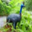

In [ ]:
pic = array_to_img(x_train_all[6])
display(pic)

In [ ]:
LABEL_NAMES[y_train_all[6][0]]

'Bird'

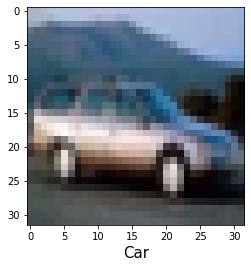

In [ ]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

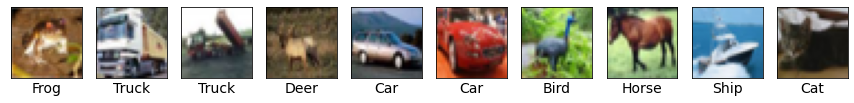

In [ ]:
plt.figure(figsize=(15,5))

for i in range(10):
   plt.subplot(1, 10, i+1)
   plt.xticks([])
   plt.yticks([])
   plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
   plt.imshow(x_train_all[i])

In [ ]:
x_train_all[0].shape

(32, 32, 3)

#PreProcess Data

In [ ]:
x_train_all[0][0][0]
#gets the array for a particular pixel

array([59, 62, 63], dtype=uint8)

In [ ]:
type(x_train_all[0][0][0][0])
#This is an integer

numpy.uint8

In [ ]:
x_train_all = x_train_all/255.0
x_test = x_test/255.0
#Now values will convert to float

In [ ]:
type(x_train_all[0][0][0][0])

numpy.float64

In [ ]:
#Flattening out our data
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)
# 32*32*3 = Number of pixels in height*width*color channels 
x_train_all.shape

(50000, 3072)

In [ ]:
x_test = x_test.reshape(x_test.shape[0], TOTAL_INPUTS)

#Create Validation Dataset

In [ ]:
  x_val = x_train_all[:VAL]
  y_val = y_train_all[:VAL]
  # Creating a validation dataset by taking the first 10k rows

In [ ]:
#Now we must remove these first 10k images from our training dataset
x_train = x_train_all[VAL:]
y_train = y_train_all[VAL:]
x_train.shape

(40000, 3072)

In [ ]:
x_train_s = x_train[:1000]
y_train_s = y_train[:1000]


#Define The Neural Networks From Keras

In [ ]:
model_1 = Sequential([Dense(units = 128, input_dim = TOTAL_INPUTS, activation = 'relu', name='m1_hidden1'),
                      Dense(units = 64, activation = 'relu', name='m1_hidden2'),
                      Dense(units = 16, activation = 'relu', name='m1_hidden3'),
                      Dense(units = 10, activation='softmax', name='m1_output')
                      ])
model_1.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model_1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 #Making sense about the parameter
32*32*3*128 #This is the total numeber of parameters coming from neurons, but as each neuron has weight and a bais so
            #We weill add 128 more
32*32*3*128+128         
 

393344

In [ ]:
32*32*3*128 + 128 + (128*64 + 64) + (64*16 + 16) + (16*10 + 10)
#For all layers

402810

In [ ]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(15, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [ ]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(15, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

#Fit the model

In [ ]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

In [ ]:
samples_per_batch = 1000

In [ ]:
# %%time
# nr_epochs = 150
# model_1.fit(x_train_s, y_train_s, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: user 1min 6s, sys: 959 ms, total: 1min 7s
Wall time: 1min 21s


In [ ]:
# %%time
# nr_epochs = 150
# model_2.fit(x_train_s, y_train_s, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 2')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: user 1min 14s, sys: 940 ms, total: 1min 15s
Wall time: 53 s


In [ ]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: user 5min 58s, sys: 3.89 s, total: 6min 2s
Wall time: 3min 19s


In [ ]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: user 9min 26s, sys: 6.12 s, total: 9min 32s
Wall time: 5min 11s


In [ ]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 3XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: user 9min 33s, sys: 6.77 s, total: 9min 40s
Wall time: 5min 23s


#Predicting

In [ ]:
x_val[0].shape

(3072,)

In [ ]:
#Now for the predict function, we need to change the dimensions of the input

test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [ ]:
np.set_printoptions(precision=3)

In [ ]:
model_2.predict(test)

array([[2.390e-02, 1.914e-03, 3.824e-02, 4.273e-02, 1.004e-01, 1.219e-02,
        7.379e-01, 4.242e-02, 1.135e-04, 2.232e-04]], dtype=float32)

In [ ]:
model_2.predict(x_val)

array([[2.390e-02, 1.914e-03, 3.824e-02, ..., 4.242e-02, 1.135e-04,
        2.232e-04],
       [4.868e-03, 1.826e-01, 2.008e-03, ..., 1.076e-02, 7.789e-02,
        6.682e-01],
       [3.181e-03, 1.309e-02, 1.452e-03, ..., 2.067e-02, 7.053e-03,
        9.357e-01],
       ...,
       [3.505e-03, 1.226e-01, 3.877e-03, ..., 4.724e-03, 2.876e-02,
        7.627e-01],
       [8.566e-03, 5.387e-01, 6.278e-02, ..., 4.937e-02, 4.370e-04,
        2.893e-01],
       [2.478e-04, 1.294e-05, 2.568e-02, ..., 7.663e-01, 2.512e-05,
        8.083e-05]], dtype=float32)

In [ ]:
#If we just want to get the ans with the highest probability
model_2.predict_classes(test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([6])

In [ ]:
np.argmax(model_1.predict(test), axis=-1)

array([6])

In [ ]:
y_val[0]

array([6], dtype=uint8)

In [ ]:
for i in range(10):
  a = model_2.predict_classes(np.expand_dims(x_val[i], axis=0))[0]
  b = y_val[i][0]
  print(f"predicted :{a} vs actual :{b}")
  
  # if a == b:
  #   print("Yay")
  # else:
  #   print("Nay")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predicted :6 vs actual :6
predicted :9 vs actual :9
predicted :9 vs actual :9
predicted :6 vs actual :4
predicted :8 vs actual :1
predicted :9 vs actual :1
predicted :6 vs actual :2
predicted :7 vs actual :7
predicted :8 vs actual :8
predicted :9 vs actual :3


#EVALUATION

In [ ]:
model_2.metrics_names

['loss', 'accuracy']

In [ ]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 3ms/step - loss: 1.4385 - accuracy: 0.4902
Test loss is 1.44 and test accuracy is 49.0%


#Confusion Matrix

In [ ]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_test, predictions)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(conf_matrix)

[[546  24  84  26  42  12  27  28 183  28]
 [ 60 547  14  29  22  24  27  21 126 130]
 [ 65  15 312  61 201 111 130  65  28  12]
 [ 30  16  83 273  68 255 172  48  28  27]
 [ 44  10 113  33 485  66 143  74  29   3]
 [ 12   8 104 162  72 430 100  66  31  15]
 [  3  11  49  61 136  52 638  27  19   4]
 [ 46   8  64  51 115  91  38 540  24  23]
 [100  44  14  22  31  39  22  15 683  30]
 [ 60 154  24  30  17  30  34  55 148 448]]


In [ ]:
conf_matrix.max()

683

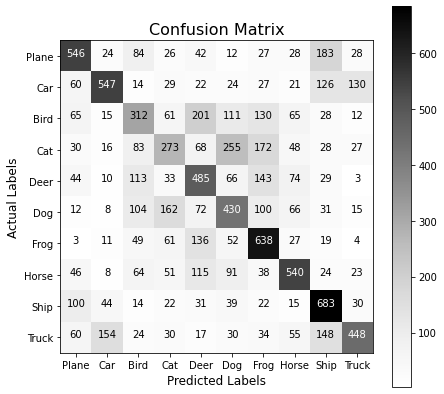

In [ ]:
plt.figure(figsize=(7,7))
plt.imshow(conf_matrix, cmap = plt.cm.Greys)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)
plt.colorbar()

for i,j in itertools.product(range(10), range(10)):
  plt.text(j, i, conf_matrix[i,j], horizontalalignment = 'center', 
           color ='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()

In [ ]:
#True Positives
np.diag(conf_matrix)

array([546, 547, 312, 273, 485, 430, 638, 540, 683, 448])

In [ ]:
recall = np.diag(conf_matrix)/np.sum(conf_matrix, axis = 1)
recall

array([0.546, 0.547, 0.312, 0.273, 0.485, 0.43 , 0.638, 0.54 , 0.683,
       0.448])

In [ ]:
precision = np.diag(conf_matrix)/np.sum(conf_matrix, axis = 0)
precision

array([0.565, 0.654, 0.362, 0.365, 0.408, 0.387, 0.479, 0.575, 0.526,
       0.622])

In [ ]:
#Just average these now
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall}')

Model 2 recall score is 0.4902


In [ ]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f1_score:.2%}')

Model 2 precision score is 49.44%
Model 2 f score is 49.23%
